# Data Analysis of the Titanic Dataset

This notebook provides a fundamental example of data analysis using the well-known Titanic dataset. We will cover data loading, initial exploration, checking for missing values, and visualizations.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first 5 rows of the dataset
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Data Loading and Initial Inspection

We've loaded the Titanic dataset using `seaborn.load_dataset()`, which is a convenient way to access common datasets directly without needing to download files manually or use API keys. The `display(df.head())` command shows us the first few rows, giving us a quick glimpse of the data structure and content.

In [2]:
# Get a concise summary of the DataFrame
print('--- DataFrame Info ---\n')
df.info()

# Display basic statistical details for numerical columns
print('\n--- Descriptive Statistics ---\n')
display(df.describe())

--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

--- Descriptive Statistics ---



,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Overview

- **`df.info()`**: This command provides a summary of the DataFrame, including the number of entries, the number of columns, data types of each column, non-null values, and memory usage. It's crucial for understanding data completeness and types.
- **`df.describe()`**: This generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding `NaN` values. It's particularly useful for numerical columns, showing count, mean, standard deviation, min, max, and quartiles.

In [3]:
# Check for missing values in each column
print('\n--- Missing Values ---\n')
display(df.isnull().sum().sort_values(ascending=False))


--- Missing Values ---



,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


## 3. Handling Missing Values

Identifying missing values is a critical step in data cleaning. The `df.isnull().sum()` method counts the number of `NaN` (Not a Number) values in each column. From the output, we can see that 'deck', 'age', and 'embark_town' have missing values, with 'deck' having a significant number.

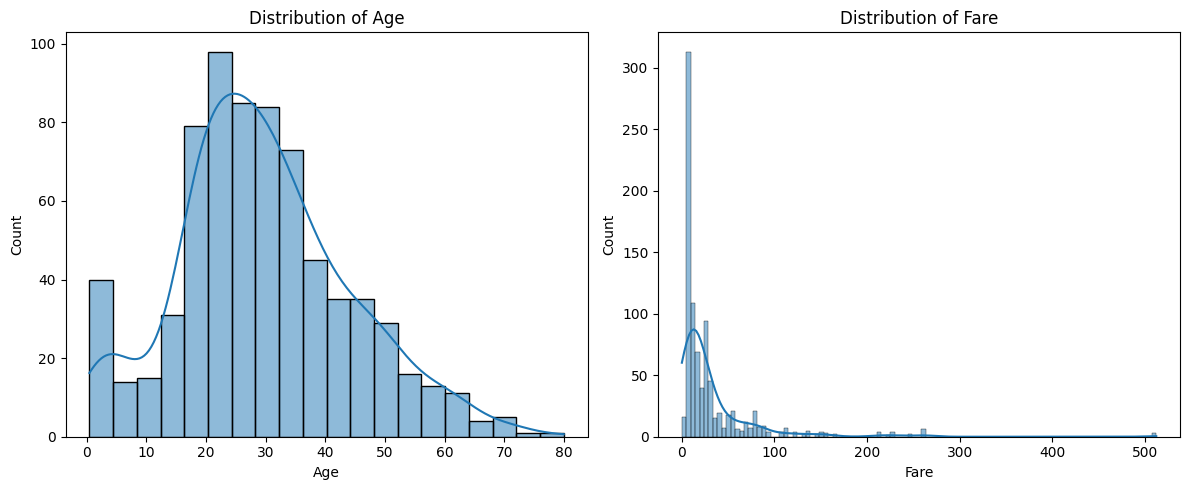

In [4]:
plt.figure(figsize=(12, 5))

# Histogram for Age distribution
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Histogram for Fare distribution
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df['fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

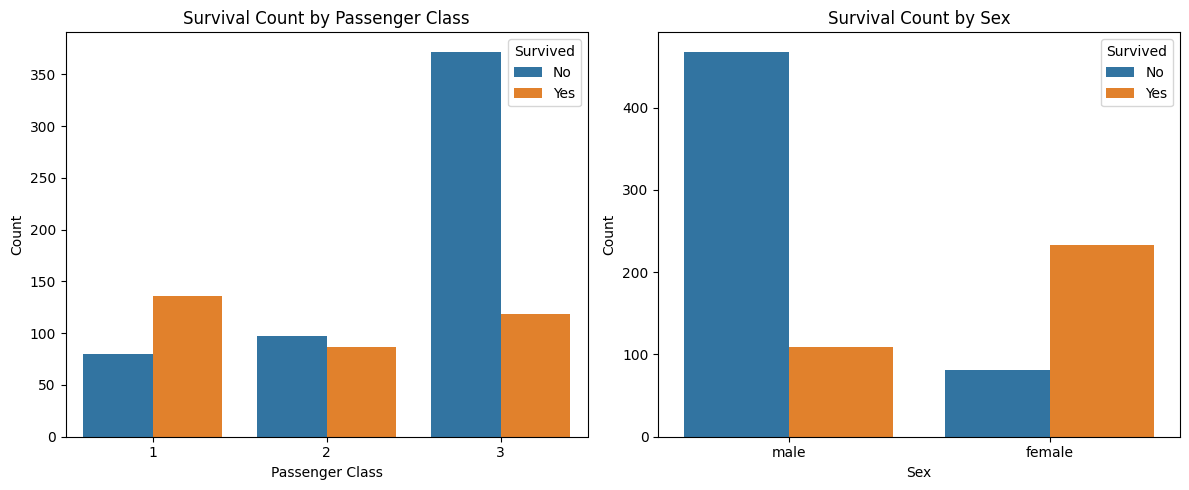

In [6]:
plt.figure(figsize=(12, 5))

# Count plot for Survival by Passenger Class
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Count plot for Survival by Sex
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

Here are two more visualizations:

- This count plot illustrates the number of survivors and non-survivors across different passenger classes. It typically reveals that passengers in higher classes had a better survival rate.
- This plot shows the distribution of survival based on gender. It often highlights the 'women and children first' policy, with a higher proportion of females surviving.

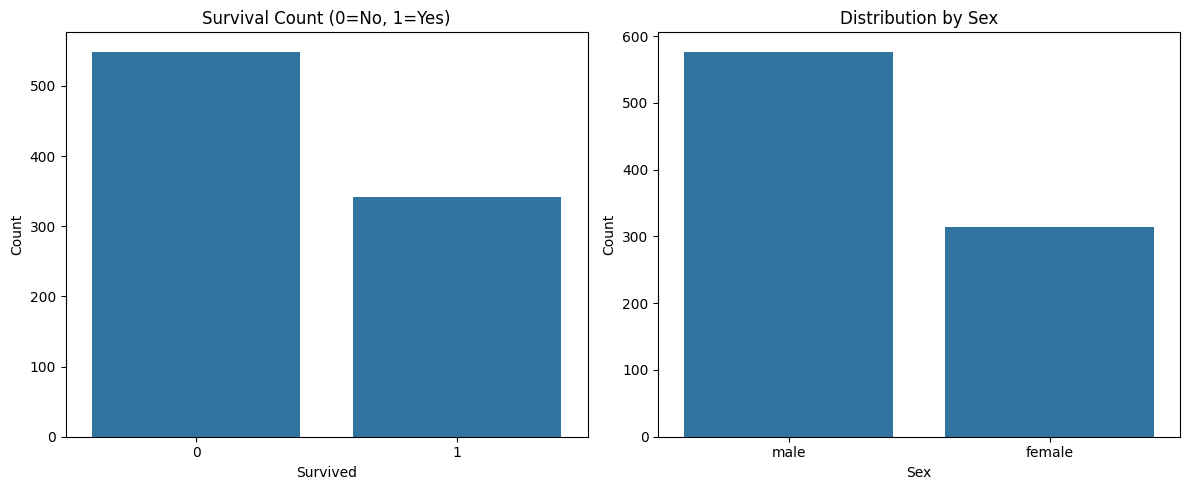

In [5]:
plt.figure(figsize=(12, 5))

# Count plot for Survived passengers
plt.subplot(1, 2, 1)
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0=No, 1=Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')

# Count plot for Sex distribution
plt.subplot(1, 2, 2)
sns.countplot(x='sex', data=df)
plt.title('Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## 4. Visualizations

Visualizations are key to understanding data patterns and distributions at a glance.

- These plots show the frequency distribution of continuous variables. We can observe that 'Age' has a relatively even distribution across younger ages, with fewer elderly passengers, and 'Fare' is heavily skewed towards lower values.
- These plots show the counts of categorical variables. We can see the number of passengers who survived versus those who didn't, and the gender distribution onboard the Titanic. These plots immediately highlight imbalances or dominant categories.